# Corner plot 

In [8]:
# Select the data file 
i = 4

In [9]:
import matplotlib
import numpy as np

data = np.load('bestfit_params_'+str(i)+'.npy')
data.shape


(5000, 14)

In [10]:
#data[:,0] = data[:,0]/(1e+3)
#data[:,1] = data[:,1]/(1e-25)
#data[:,2] = data[:,2]/(1e-24)
#data[:,3] = data[:,3]/(1e-25)

'''
Best-fit parameters are:
DM mass = 2.7
sigmav_line = 1.6105539999999996e-25
sigmav_WW = 1.1474299999999999e-24
sigmav_ZZ = 3.8576299999999995e-25
sigmav_bb = 0
sigmav_hh = 0
sigmav_tt = 0
others = 1
'''

print(data[1,:])

[2.88300000e+03 3.06758645e-25 1.25934263e-34 2.41753284e-34
 9.85383997e-35 4.88148411e-35 2.54540833e-35 9.67165194e-01
 1.54092294e-09 1.85013116e-10 1.83898674e-08 2.06718032e-08
 1.95709529e+01 2.37732252e+00]


In [11]:
dm_params = data[:,0:7]
dm_params.shape

(5000, 7)

In [12]:
dm_params[0]

array([2.87900000e+03, 3.06421465e-25, 1.75572890e-34, 1.32722167e-34,
       1.96842542e-36, 8.09463607e-36, 1.28230759e-36])

In [13]:
import corner #install as "> conda install -c astropy corner"

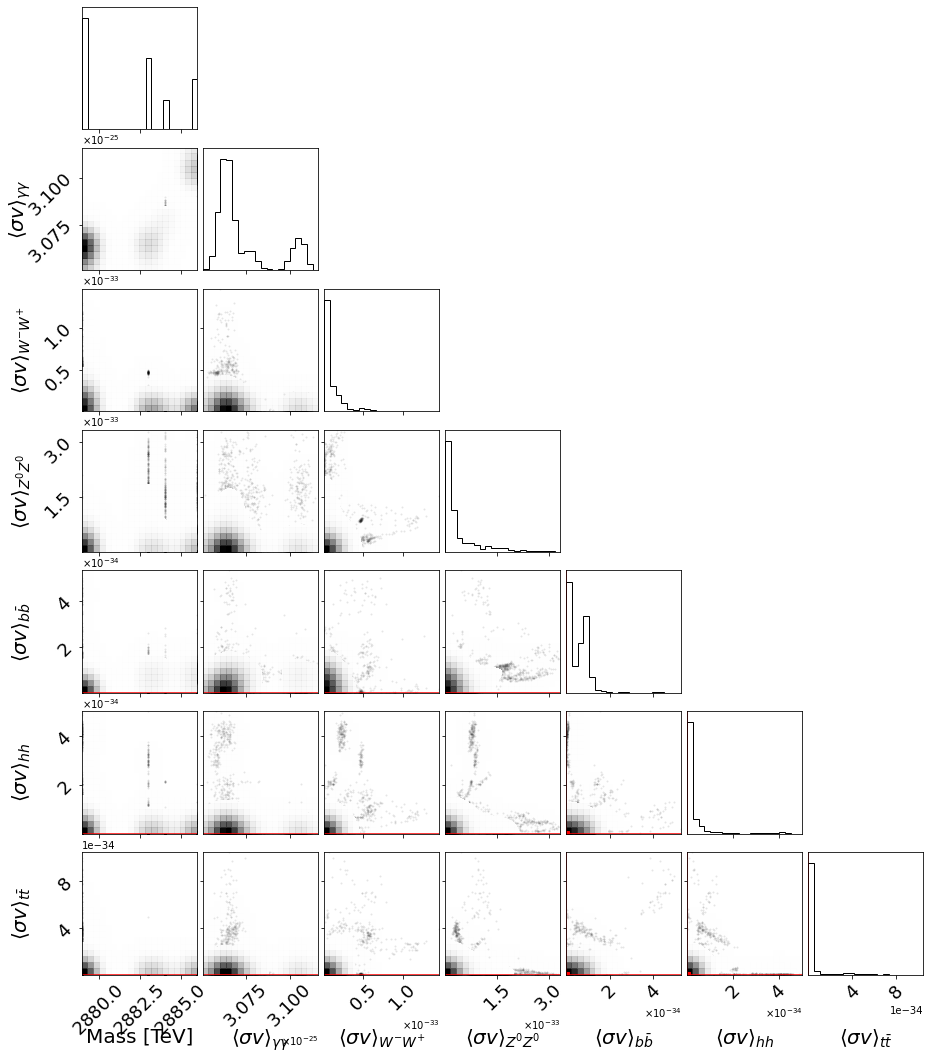

In [14]:
names = [r'Mass [TeV]',
         r'$\langle\sigma v \rangle_{\gamma\gamma}$',
         r'$\langle\sigma v \rangle_{W^{-}W^{+}}$',
         r'$\langle\sigma v \rangle_{Z^0 Z^0}$',
         r'$\langle\sigma v \rangle_{b\bar{b}}$',
         r'$\langle\sigma v \rangle_{hh}}$',
         r'$\langle\sigma v \rangle_{t\bar{t}}$']
'''
         r'$c_1$',
         r'$c_2$',
         r'$c_3$',
         r'$c_4$',
         r'$c_5$',
         r'$c_6$',
         r'$c_7$']
'''

range = [(2650,2750), (8.1e-26,2e-25), (3e-25,2e-24), (4e-26,4e-25), (4e-31,4e-30), (4e-30,4e-29), (4e-27,4e-26)]

truths = [2.7e3, 1.610554e-25,1.14743e-24, 3.85763e-25, 0, 0, 0] #, 1, 1, 1, 1, 1, 1, 1]


figure = corner.corner(dm_params, labels=names, truths=truths, #range=range,
                       plot_contours=False,smooth=2.0, color='black',
                       label_kwargs={'fontsize':20}, truth_color='red',
                       use_math_text=True, max_n_ticks=3, labelpad=0.13)
figure.subplots_adjust(left=0.12, bottom=0.08, right=0.85, top=0.92, wspace=0.05, hspace=0.15)

# Get the axes
ndim = int(np.sqrt(len(figure.axes)))
axes = np.array(figure.axes).reshape((ndim, ndim))

# Bigger tick labels
for ax in axes[1:, 0]:
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(formatter)
for ax in axes[-1, :]:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.xaxis.set_major_formatter(formatter)


figure.savefig('corner_'+str(i)+'.pdf')